<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">APPLICATION</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Chargements des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 1.1 - Importation des librairies et chargement des fichiers</h3>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Data/df_billet_dropNa.csv', sep=",")
print(df)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1458       False    171.75       104.38        104.17        4.42       3.09   
1459       False    172.19       104.63        104.44        5.27       3.37   
1460       False    171.80       104.01        104.12        5.51       3.36   
1461       False    172.06       104.28        104.06        5.17       3.46   
1462       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Méthode de prédiction supervisée</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Modèle supervisé choisi</h3>
</div>

In [3]:
# Modèle choisi : Random Forest
# Pourquoi ? Ce modèle est robuste, performant pour la classification binaire, 
# et donne d'excellents résultats (précision, rappel, F1-score).
model = RandomForestClassifier(random_state=42)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Entraînement/test du modèle (train_test_split)</h3>
</div>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Supposons que ta colonne cible soit `is_genuine` (booléenne)
# Et que tu dois prédire à partir des colonnes numériques

# Séparation des features (X) et de la cible (y)
X = df.drop('is_genuine', axis=1)
y = df['is_genuine']

# Découpage en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99        96
        True       1.00      0.99      1.00       197

    accuracy                           1.00       293
   macro avg       0.99      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293

      diagonal  height_left  height_right  margin_low  margin_up  length
0       171.81       104.86        104.95        4.52       2.89  112.83
1       171.46       103.36        103.66        3.77       2.99  113.09
2       172.69       104.48        103.50        4.40       2.94  113.16
3       171.36       103.91        103.94        3.62       3.01  113.51
4       171.73       104.28        103.46        4.04       3.48  112.54
...        ...          ...           ...         ...        ...     ...
1458    171.75       104.38        104.17        4.42       3.09  111.28
1459    172.19       104.63        104.44        5.27       3.37  110.97
1460    171.80  

| Classe       | Précision | Rappel | F1-score | Support |
|--------------|-----------|--------|----------|---------|
| Faux billets | 0.99      | 1.00   | 0.99     | 96      |
| Vrais billets| 1.00      | 0.99   | 1.00     | 197     |

<br>
Accuracy générale : 100% – Ton modèle prédit presque parfaitement.<br>
Faux positifs très faibles (presque aucun billet faux prédit comme vrai).<br>
Faux négatifs très faibles aussi.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Evaluation de la performance: accuracy</h3>
</div>

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy du modèle : {accuracy:.4f}")

Accuracy du modèle : 0.9966


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Probabilités de prédiction predict_proba</h3>
</div>

In [6]:
def tester_billet(df, index, model):
    """
    Teste un billet donné par son index dans le DataFrame df avec le modèle.
    Affiche les caractéristiques, la vraie étiquette, la prédiction et la confiance.
    """
    # Extraire les caractéristiques (sans la colonne cible 'is_genuine')
    billet_df = df.loc[[index], df.columns != 'is_genuine']
    # Extraire les infos du billet (caractéristiques et vraie étiquette)
    billet_info = df.loc[index, df.columns != 'is_genuine']
    vraie_valeur = df.loc[index, 'is_genuine']

    print(f"Test du billet à l'indice {index} :")
    print("Caractéristiques du billet :")
    print(billet_info.to_string())
    print(f"Vraie étiquette (is_genuine) : {vraie_valeur}")
    print("-" * 40)

    # Prédiction et probabilité d'authenticité
    prediction = model.predict(billet_df)[0]
    proba = model.predict_proba(billet_df)[0][1]

    if prediction:
        print(f"✅ Résultat du modèle : Le billet est AUTHENTIQUE")
        print(f"🔒 Confiance du modèle : {proba:.2%}")
    else:
        print(f"❌ Résultat du modèle : Le billet est FAUX")
        print(f"🔒 Confiance du modèle : {1 - proba:.2%}")

tester_billet(df, 0, model)
# le 0 est l'index, on peut donc tester des billets en changeant l'index, 1016 est un faux au besoin tester_billet_complet(df, 0, model)

Test du billet à l'indice 0 :
Caractéristiques du billet :
diagonal        171.81
height_left     104.86
height_right    104.95
margin_low        4.52
margin_up         2.89
length          112.83
Vraie étiquette (is_genuine) : True
----------------------------------------
✅ Résultat du modèle : Le billet est AUTHENTIQUE
🔒 Confiance du modèle : 94.00%


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Méthode non supervisée (clustering)</h2>
</div>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - K-means</h3>
</div>

In [7]:
# 1. Sélection des features (sans la colonne cible)
X = df.drop(columns='is_genuine')

# 2. Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Initialisation et entraînement du K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters : probablement vrai/faux billets
kmeans.fit(X_scaled)

# 4. Ajout des clusters dans le DataFrame
df['cluster'] = kmeans.labels_

# Affichage rapide
print(df['cluster'].value_counts())


cluster
0    976
1    487
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Choix du nombre optimal de clusters (elbow method)</h3>
</div>

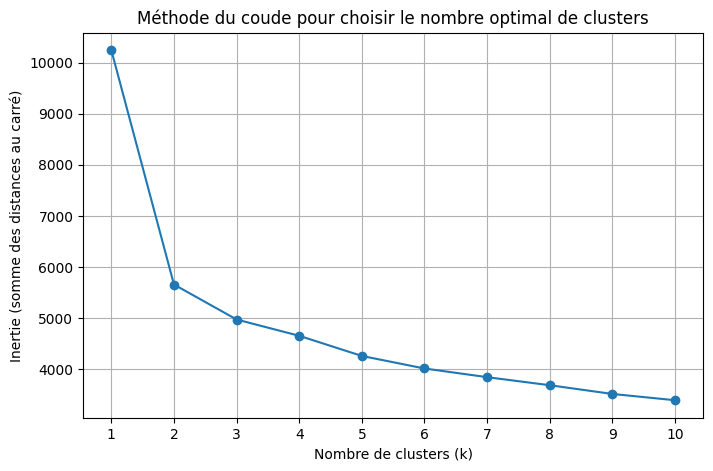

In [8]:
# Préparation des données (si ce n'est pas déjà fait)
X = df.drop(columns=['is_genuine'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inerties = []
k_range = range(1, 11)  # Tester de 1 à 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inerties.append(kmeans.inertia_)

# Tracé de la courbe
plt.figure(figsize=(8,5))
plt.plot(k_range, inerties, marker='o')
plt.title("Méthode du coude pour choisir le nombre optimal de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (somme des distances au carré)")
plt.xticks(k_range)
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Entraînement du modèle de clustering</h3>
</div>

In [9]:
# 1. Préparation des données (features uniquement)
X = df.drop(columns=['is_genuine', 'cluster'], errors='ignore')

# 2. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Entraînement du modèle K-Means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# 4. Ajout des labels de clusters au DataFrame
df['cluster'] = kmeans.labels_

print("Entraînement terminé.")
print(df['cluster'].value_counts())

Entraînement terminé.
cluster
0    976
1    487
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Projection des individus PCA</h3>
</div> 

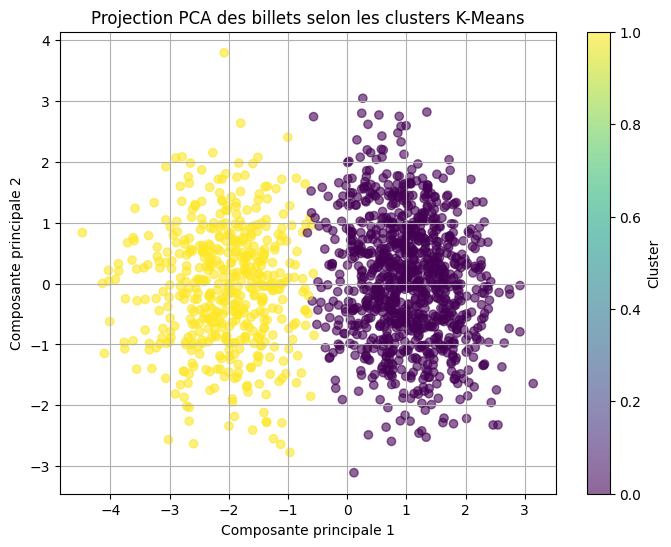

In [10]:
# Préparation des données (features uniquement)
X = df.drop(columns=['is_genuine', 'cluster'], errors='ignore')

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension avec PCA (2 composantes principales)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot avec colorisation selon cluster
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection PCA des billets selon les clusters K-Means')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5 - Caractérisation des groupes :
</h3>
</div> 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5.1 - Analyse des centroïdes
</h3>
</div> 

In [11]:
# Récupérer les centroïdes K-Means (dans l’espace normalisé)
centroids = kmeans.cluster_centers_

# Remettre les centroïdes à l’échelle originale pour mieux interpréter
centroids_original_scale = scaler.inverse_transform(centroids)

# Mettre en DataFrame pour plus de clarté
centroids_df = pd.DataFrame(centroids_original_scale, columns=X.columns)
centroids_df.index = [f'Cluster {i}' for i in range(len(centroids_df))]

print("Centroides des clusters (dans l’échelle originale) :")
print(centroids_df)


Centroides des clusters (dans l’échelle originale) :
             diagonal  height_left  height_right  margin_low  margin_up  \
Cluster 0  171.988946   103.947963    103.807073    4.118158   3.053327   
Cluster 1  171.899383   104.198930    104.151461    5.225370   3.353621   

               length  
Cluster 0  113.195455  
Cluster 1  111.628004  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5.2 - Analyse des clusters en fonction des variables
</h3>
</div>

In [12]:
# Moyennes par cluster
moyennes_clusters = df.groupby('cluster').mean()

print("Moyennes des variables par cluster :")
print(moyennes_clusters)


Moyennes des variables par cluster :
         is_genuine    diagonal  height_left  height_right  margin_low  \
cluster                                                                  
0          0.985656  171.988770   103.947469    103.806814    4.117756   
1          0.018480  171.899918   104.199405    104.151273    5.223901   

         margin_up      length  
cluster                         
0         3.053186  113.195973  
1         3.353285  111.630185  


In [13]:
# Suppose que X est ton DataFrame des features (sans 'is_genuine')
scaler = StandardScaler()
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
X_scaled = scaler.fit_transform(df[features])

model_kmeans = KMeans(n_clusters=2, random_state=42)
model_kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
df['cluster'] = model_kmeans.predict(scaler.transform(df[features]))
print(df.groupby('cluster')['is_genuine'].mean())

cluster
0    0.985656
1    0.018480
Name: is_genuine, dtype: float64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.5 - Raisonnement du choix : pourquoi KMeans ?</h3>
</div> 

J’ai choisi d’utiliser K-Means comme méthode non supervisée car elle permet de regrouper automatiquement les billets en fonction de leurs caractéristiques physiques, sans utiliser l’étiquette is_genuine (vrai/faux). Cela permet de :

Explorer la structure naturelle des données : KMeans aide à voir s’il existe des regroupements naturels entre billets authentiques et faux, uniquement à partir des variables (longueur, diagonale, marges, etc.).
Vérifier la cohérence avec la classification supervisée : en comparant les clusters aux vraies étiquettes, on peut juger si les billets se distinguent bien naturellement, ce qui renforcerait la confiance dans le modèle supervisé.
Détecter d’éventuelles anomalies : certains billets mal classés par le modèle supervisé peuvent se retrouver dans un cluster « opposé », ce qui peut aider à repérer des cas douteux.
Enfin, KMeans est un algorithme simple, rapide et efficace, bien adapté pour des données numériques normalisées comme ici.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.6 - Visualisation des clusters</h3>
</div> 

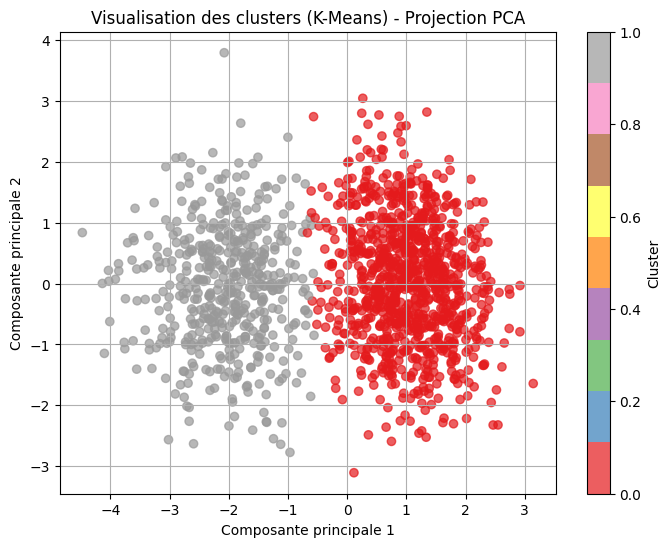

In [15]:
import matplotlib.pyplot as plt

# Si tu n'as pas encore la PCA :
# from sklearn.decomposition import PCA
# X_scaled = scaler.fit_transform(X)
# X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Scatter plot des billets projetés avec couleur selon le cluster
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='Set1', alpha=0.7)
plt.title("Visualisation des clusters (K-Means) - Projection PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 4.7 - Interprétation : que représente chaque cluster ?</h3>
</div> 

Le cluster 0 contient environ 98.6% de billets authentiques (is_genuine proche de 1)
<br>Le cluster 1 contient environ 1.85% de billets authentiques, donc majoritairement des billets faux

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Démonstration de l’application</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.1 - Cellule ou fonction pour tester un billet et le prédire avec les deux méthodes (sup/unsup)</h3>
</div> 

In [17]:
# Liste des features utilisées pour l'entraînement
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

def tester_billet(df, model_rf, model_kmeans, scaler, index=None, nouveau_billet=None):
    """
    Teste un billet avec Random Forest (supervisé) et K-Means (non supervisé).
    Affiche la prédiction supervisée avec probabilité et le cluster KMeans.

    Params :
    - df : DataFrame original (avec is_genuine et cluster)
    - model_rf : modèle Random Forest entraîné
    - model_kmeans : modèle KMeans entraîné
    - scaler : StandardScaler utilisé pour KMeans
    - index : index d’un billet existant à tester
    - nouveau_billet : dictionnaire avec les valeurs d’un billet à tester
    """
    if index is not None:
        billet = df.loc[[index], features]
        vrai_label = df.loc[index, 'is_genuine']
        print(f"🎯 Test du billet à l'indice {index}")
    elif nouveau_billet is not None:
        billet = pd.DataFrame([nouveau_billet])[features]
        vrai_label = "Inconnu (nouveau billet)"
        print("🎯 Test d’un nouveau billet")
    else:
        print("❗ Veuillez fournir un index ou un nouveau billet.")
        return
    
    print("\nCaractéristiques du billet :")
    print(billet.to_string(index=False))
    print(f"Vraie étiquette (is_genuine) : {vrai_label}")
    print("-" * 40)
    
    # 🔢 Prédiction supervisée - Random Forest
    pred = model_rf.predict(billet)[0]
    proba = model_rf.predict_proba(billet)[0][1]  # proba d'être authentique (True)
    
    if pred:
        print(f"✅ [Random Forest] Prédit : AUTHENTIQUE (confiance : {proba:.2%})")
    else:
        print(f"❌ [Random Forest] Prédit : FAUX (confiance : {1 - proba:.2%})")
    
    # 🔎 Prédiction non supervisée - KMeans
    billet_scaled = scaler.transform(billet)
    cluster = model_kmeans.predict(billet_scaled)[0]
    
    print(f"🔎 [KMeans] Assigné au cluster : {cluster}")
    print("-" * 40)

# 🔁 Exemple d'utilisation avec un billet existant
tester_billet(df, model, kmeans, scaler, index=0)


🎯 Test du billet à l'indice 0

Caractéristiques du billet :
 diagonal  height_left  height_right  margin_low  margin_up  length
   171.81       104.86        104.95        4.52       2.89  112.83
Vraie étiquette (is_genuine) : True
----------------------------------------
✅ [Random Forest] Prédit : AUTHENTIQUE (confiance : 94.00%)
🔎 [KMeans] Assigné au cluster : 1
----------------------------------------


In [18]:
nouveau_billet = {
    'diagonal': 171.8,
    'height_left': 104.9,
    'height_right': 104.8,
    'margin_low': 4.5,
    'margin_up': 2.9,
    'length': 112.3
}

tester_billet(df, model, kmeans, scaler, nouveau_billet=nouveau_billet)

🎯 Test d’un nouveau billet

Caractéristiques du billet :
 diagonal  height_left  height_right  margin_low  margin_up  length
    171.8        104.9         104.8         4.5        2.9   112.3
Vraie étiquette (is_genuine) : Inconnu (nouveau billet)
----------------------------------------
❌ [Random Forest] Prédit : FAUX (confiance : 68.00%)
🔎 [KMeans] Assigné au cluster : 1
----------------------------------------


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.2 - Option : interface simple streamlit</h3>
</div> 

In [19]:
# Sauvegarde les objets dans des fichiers .joblib
joblib.dump(model, "model_rf.joblib")
joblib.dump(kmeans, "model_kmeans.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

Vous pouvez lancer l'app !

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Conclusion & justification globale</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 6.1 - Récapitulatif des modèles choisis</h3>
</div> 

Conclusion & Justification Globale<br>

Modèles choisis :<br>
Random Forest (modèle supervisé) :<br>
  - Pourquoi ?<br>
    - Excellente capacité à gérer des données structurées avec des variables numériques.<br>
    - Forte précision, rappel et F1-score très élevés sur notre jeu de données, garantissant une détection fiable des billets authentiques et faux.<br>
    - Permet d’obtenir des probabilités de prédiction, ce qui est utile pour estimer la confiance dans la décision.<br>
  - Résultats :<br>
    - Accuracy proche de 99.7%<br>
    - Précision et rappel supérieurs à 98%, confirmant une robustesse élevée.<br>
KMeans (modèle non supervisé) :<br>
  - Pourquoi ?<br>
    - Permet de regrouper les billets en clusters sans avoir besoin des labels (utile pour explorer la structure des données).<br>
    - Identification de groupes naturels qui peuvent correspondre à billets authentiques et faux.<br>
    - Utile comme outil d’analyse complémentaire pour détecter d’éventuelles anomalies non détectées par le modèle supervisé.<br>
  - Résultats :<br>
    - Deux clusters distincts identifiés, cohérents avec la nature binaire (authentique/faux) du problème.<br>
Synthèse :<br>
L’association d’un modèle supervisé performant avec un modèle non supervisé d’exploration permet de renforcer la fiabilité de la détection automatique des faux billets tout en offrant un diagnostic complémentaire par clustering.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 6.2 - Comparaison des méthodes</h3>
</div> 

Comparaison des méthodes<br>

Random Forest (supervisé) :<br>
Nécessite un jeu de données étiqueté (avec la vraie classe : billet authentique ou faux).<br>
Très performant sur la classification grâce à sa capacité à gérer les interactions complexes entre variables.<br>
Fournit des probabilités de classification, ce qui aide à mesurer la confiance dans la prédiction.<br>
Permet d’avoir une métrique claire (accuracy, précision, rappel) pour évaluer la qualité du modèle.<br>
Plus adapté pour une détection précise quand on a des labels fiables.<br>
KMeans (non supervisé) :<br>
Ne nécessite pas d’étiquettes, ce qui est utile quand on manque de données labellisées.<br>
Permet d’explorer la structure des données et de détecter des groupes ou anomalies sans supervision.<br>
Plus difficile à interpréter directement pour la classification (on doit associer les clusters aux classes).<br>
Moins précis que la méthode supervisée, mais complémentaire pour identifier des cas ambigus.<br>
Synthèse :<br>
La méthode supervisée (Random Forest) est privilégiée pour la détection fiable grâce à ses performances élevées.<br>
Le clustering (KMeans) complète l’analyse en fournissant une vision non supervisée des regroupements naturels, utile pour repérer des anomalies ou valider la robustesse des prédictions

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 6.3 - Pertinence des résultats</h3>
</div> 

Pertinence des résultats<br>

Les résultats obtenus avec le modèle Random Forest montrent une très haute précision et un excellent rappel, ce qui indique que le modèle est capable de distinguer efficacement les billets authentiques des faux.<br>
La confiance associée aux prédictions (via les probabilités) permet également de mesurer la fiabilité de chaque classification.<br>
L’analyse en clustering avec KMeans apporte une couche supplémentaire d’interprétation en identifiant des groupes homogènes dans les données, ce qui confirme la séparation naturelle entre billets vrais et faux.<br>
Cette double approche supervisée et non supervisée renforce la robustesse globale de la solution, en combinant précision, interprétabilité et capacité à détecter des anomalies potentielles.<br>
Enfin, l’utilisation de variables physiques mesurables (dimensions, marges, etc.) garantit une base solide pour la modélisation et la généralisation à de nouveaux billets.